### Statistical Inference: Bootstrap Confidence Interval

This notebook demostrates how to construct confidence interval of a statistic using the bootstrap method. We will also examine the coverage probability of CI.

- Construct Bootstrap Confidence Interval
- Check the coverage probability
- Bootstrap CI for correlation coefficient

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Generate some random data
data = np.random.randn(100)*10 + 20

data

array([20.04837603, 31.25284426, 29.93398006, 25.61713655, 13.5503907 ,
       25.49878444, 20.35248077, 31.51038142,  8.32313121, 19.66393583,
       17.61347326, 16.62564633, 18.86746951, 26.16251563, 13.34781926,
       23.19121695, 11.61700195, 11.13124794, 36.09426776, 18.05663548,
        9.94349398, 37.48716962, 20.14559004,  9.97229743,  2.03475692,
       30.54969641, 14.56507249, 28.36896004, 36.65606655, 20.02810189,
       10.141344  , 27.10628831, 22.07188247, 24.84692248, -1.3261212 ,
       13.82170342, 17.16935212,  1.86395292, 16.67269339, 23.48550858,
       15.30715956, 13.87936844, 15.34618299, 19.07465262,  7.26095313,
       14.16604599, 23.54688298, 25.81009889, 23.60397487, 24.71990081,
       29.67728618, 26.613439  , 18.71653559, 26.09803616, 25.86535171,
       35.66452474,  8.04290181, 26.74722961, 56.86598676, 27.18349189,
       34.42831875, 14.87913466, 27.75998308, 16.58230786, 28.79498633,
       30.17491135, 19.37373865,  3.56354925, 26.9547936 , 13.91

(array([ 6., 14., 35., 25., 14.,  5.,  0.,  1.]),
 array([-1.3261212 ,  5.9478923 , 13.22190579, 20.49591929, 27.76993278,
        35.04394628, 42.31795977, 49.59197327, 56.86598676]),
 <BarContainer object of 8 artists>)

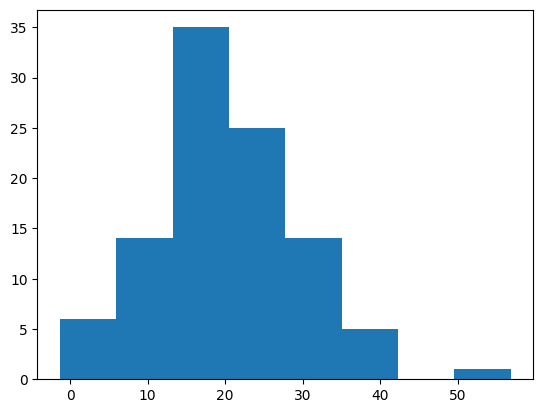

In [3]:
plt.hist(data,bins=8)

In [4]:
print("Population mean is:", np.mean(data))

print("Population variance is:", np.var(data))

Population mean is: 20.45575404162354
Population variance is: 90.89902433788778


In [5]:
#One sample with 30 numbers, this is what we have in hand.

sample_30 = np.random.choice(data, 30, replace=True)

sample_30

array([23.54688298, 31.9271731 , 23.01355589,  8.04290181, 29.67728618,
       23.01355589, 33.28302387, 13.34781926, 19.37373865,  2.10912426,
       30.17491135, -1.3261212 ,  1.86395292,  2.03475692, 15.5497332 ,
       19.1209175 , 24.84692248,  8.32313121, 17.01193253, 29.93398006,
       20.35248077, 14.10769395, 14.87913466, 26.74722961, 20.14559004,
       11.61700195, 17.01193253, 25.86535171, 56.86598676, 29.67728618])

1. Construct Bootstrap CI

In [6]:
#Define a bootstrap function:
def bootstrap(sample):
    
    bootstrap_mean_list = []
    
    for i in range(10000):
        #generate a re-sample with the original sample size, with replacement
        subsample = np.random.choice(sample, len(sample), replace=True)
        
        #compute sub-sample mean
        subsample_mean = np.mean(subsample)

        bootstrap_mean_list.append(subsample_mean)
    
    #Calculatet the mean and std of the bootstrap sampling distribution
    bootstrap_mean = np.mean(bootstrap_mean_list)
    boostrap_std = np.std(bootstrap_mean_list)
    
    # mean +- 2*std for an approximate 95% CI.
    CI = [(bootstrap_mean - 2*boostrap_std), (bootstrap_mean + 2*boostrap_std)]
    
    return CI,bootstrap_mean_list
    

In [29]:
sample_mean_list = []
    
for i in range(10000):
    #generate a re-sample with the original sample size, with replacement
    sample10 = np.random.choice(data, 30)
        
        #compute sub-sample mean
    subsample_mean = np.mean(sample10)

    sample_mean_list.append(subsample_mean)
    

(array([  12.,  101.,  608., 1837., 3004., 2664., 1314.,  388.,   65.,
           7.]),
 array([13.78510405, 15.16885258, 16.55260111, 17.93634964, 19.32009817,
        20.7038467 , 22.08759523, 23.47134376, 24.85509229, 26.23884082,
        27.62258935]),
 <BarContainer object of 10 artists>)

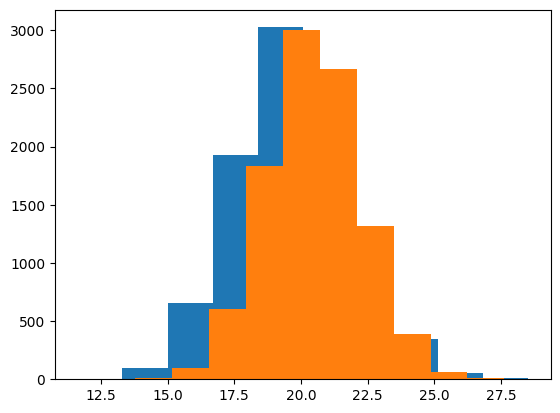

In [31]:
plt.hist(bootstrap_mean_list)
plt.hist(sample_mean_list)


In [7]:
#Do the same thing for the percentile-based method:
def bootstrap_perc(sample):
    
    bootstrap_mean_list = []
    
    for i in range(10000):
        #generate a re-sample with the original sample size, with replacement
        subsample = np.random.choice(sample, len(sample), replace=True)
        
        #compute sample mean
        subsample_mean = np.mean(subsample)

        bootstrap_mean_list.append(subsample_mean)
    
    #Get the lower and upper bound for the middle 95%:
    percentile_CI = [np.percentile(bootstrap_mean_list, 2.5), 
          np.percentile(bootstrap_mean_list, 97.5)]
    
    return percentile_CI,bootstrap_mean_list
    

In [8]:
#Define a anlytical based function:
def anlytical(sample):    
    sample_mean = np.mean(sample)
    
    err_of_margin = 2*np.std(sample)/np.sqrt(len(sample))
    
    # mean +- 2*std for an approximate 95% CI.
    CI_lower = sample_mean - err_of_margin
    CI_upper = sample_mean + err_of_margin
    
    CI = [CI_lower, CI_upper]
    
    return CI

Compare the bootstrap vs. analytical CI:

In [9]:
bootstrap_CI, bootstrap_mean_list = bootstrap(sample_30)
bootstrap_CI_perc, bootstrap_mean_list_perc = bootstrap_perc(sample_30)
analytical_CI = anlytical(sample_30)

In [10]:
print("95% analytical CI: ", analytical_CI)
print("95% bootstrap CI: ", bootstrap_CI)
print("95% percentile-based bootstrap CI: ", bootstrap_CI_perc)

95% analytical CI:  [15.458954615201204, 24.016969853357946]
95% bootstrap CI:  [15.476395171330902, 23.944921597599354]
95% percentile-based bootstrap CI:  [15.626758976939456, 24.051611573969733]


2. Testing the coverage of the 95% CI for 
- Bootstrap
- Percentile based Bootstrap
- Analytical

In [11]:
%%time
#generate samples for multiple times
counter = 0
counter_perc = 0
true_mean = np.mean(data)

for i in range(1000):
    #generate a sample with 30 numbers
    sample = np.random.choice(data, 30, replace=True)
    
    #For each sample, we compute the two CIs:
    ci,_ = bootstrap(sample)
    perc_ci,_ = bootstrap_perc(sample)
    analytical_ci = anlytical(sample)
    
    #Check the coverage
    if ci[0] <= true_mean <= ci[1]:
        counter = counter + 1
        
    if perc_ci[0] <= true_mean <= perc_ci[1]:
        counter_perc = counter_perc + 1

CPU times: user 2min 55s, sys: 3.04 s, total: 2min 58s
Wall time: 2min 57s


In [12]:
print("Number of times 95% bootstrap CI covered the population mean:", 
      counter,"out of 1000")

Number of times 95% bootstrap CI covered the population mean: 944 out of 1000


In [13]:
print("Number of times 95% percentile-based bootstrap CI covered the population mean:", 
      counter,"out of 1000")

Number of times 95% percentile-based bootstrap CI covered the population mean: 944 out of 1000


In [14]:
print("Number of times 95% analytical CI covered the population mean:", 
      counter,"out of 1000")

Number of times 95% analytical CI covered the population mean: 944 out of 1000


3. Bootstrap confidence interval for correlation coefficients

In [15]:
import pandas as pd
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv'
df = pd.read_csv(url)
df = df.dropna()

Text(0, 0.5, 'Acceleration')

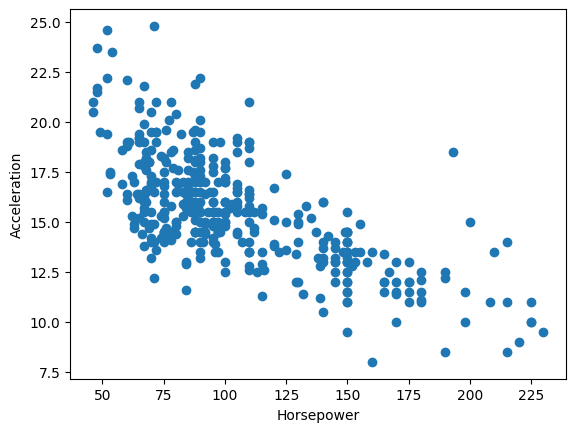

In [16]:
from scipy.stats import *

plt.scatter(df.horsepower, df.acceleration)
plt.xlabel("Horsepower")
plt.ylabel("Acceleration")

In [17]:
print("Pearson:",pearsonr(df.horsepower, df.acceleration))

Pearson: PearsonRResult(statistic=-0.6891955103342371, pvalue=1.5818862297811214e-56)


In [18]:
sample_car = df.sample(frac=0.3,replace=True)
sample_car

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
181,33.0,4,91.0,53.0,1795,17.5,75,japan,honda civic cvcc
289,16.9,8,350.0,155.0,4360,14.9,79,usa,buick estate wagon (sw)
227,19.0,6,225.0,100.0,3630,17.7,77,usa,plymouth volare custom
335,35.0,4,122.0,88.0,2500,15.1,80,europe,triumph tr7 coupe
26,10.0,8,307.0,200.0,4376,15.0,70,usa,chevy c20
...,...,...,...,...,...,...,...,...,...
144,31.0,4,76.0,52.0,1649,16.5,74,japan,toyota corona
27,11.0,8,318.0,210.0,4382,13.5,70,usa,dodge d200
349,34.1,4,91.0,68.0,1985,16.0,81,japan,mazda glc 4
18,27.0,4,97.0,88.0,2130,14.5,70,japan,datsun pl510


In [19]:
print("Pearson:",pearsonr(sample_car.horsepower, sample_car.acceleration))

Pearson: PearsonRResult(statistic=-0.6520334620459914, pvalue=1.270363720648511e-15)


In [20]:
#Define a bootstrap function:
np.random.seed(222)
def bootstrap_pearson(sample_car):
    
    bootstrap_cor_list = []
    
    for i in range(10000):
        #generate a re-sample with the original sample size, with replacement
        subsample = sample_car.sample(len(sample), replace=True)
        
        #compute correlation
        sample_cor = pearsonr(subsample.horsepower, subsample.acceleration)[0]

        bootstrap_cor_list.append(sample_cor)
    
    #Get the lower and upper bound for the middle 95%:
    percentile_CI = [np.percentile(bootstrap_cor_list, 2.5), 
          np.percentile(bootstrap_cor_list, 97.5)]
    
    return percentile_CI
    

In [21]:
bootstrap_pearson(sample_car)

[-0.8173989100096165, -0.43221063281055677]

In [22]:
print("95% confidence interval of the Pearson correlation coefficient is:",
     "[-0.86 to -0.29]")


95% confidence interval of the Pearson correlation coefficient is: [-0.86 to -0.29]


We are 95% confident that the true correlation of HP and ACC in the population is between -0.86 to -0.29.

In this case, the CI doesn't cover 0, which means population correlation coefficient is not zero. So the negative trend we observe from the sample isn't just becuase of the sampling variation but because the true correlation is negative in the population.